# Hypothesen zu Ursachen großer QTTR-Veränderungen

## 1. Überblick
Im Rahmen des Projekts analysieren wir Ursachen starker QTTR-Veränderungen. Dazu haben wir Hypothesen gebildet, systematisch kategorisiert und priorisiert.

## 2. Kategorien und Hypothesen

### 2.1 Spielerische Entwicklung
- **Intensiviertes Training oder Vereinswechsel:** Spieler:innen trainieren intensiver oder in besserem Umfeld → Leistungssteigerung.
- **Altersbedingte Entwicklung:** Junge Spieler:innen verbessern sich schnell; bei Senioren ist Leistungsabfall möglich.

### 2.2 Berechnungstechnische Ursachen
- **Inaktivitätsabzug:** Nach längerer Inaktivität erfolgt ein starker QTTR-Abzug; bei Wiedereinstieg kann es zu starker Gegenbewegung kommen.
- **Geringe Spielanzahl:** Wenige Spiele führen zu hoher Varianz im QTTR-Wert.
- **Einseitige Gegnerauswahl:** Spiele hauptsächlich gegen viel stärkere oder schwächere Gegner verzerren den QTTR.

### 2.3 Datenqualität
- **Fehlerhafte Spielerzuordnung:** QTTR-Veränderungen durch falsche Namenszuordnung oder Verwechslungen.
- **Falsche Spielmeldungen:** Ergebnisse wurden falsch gemeldet oder zugewiesen.

### 2.4 Wettbewerbskontext
- **Ligawechsel:** Spielniveau ändert sich drastisch → QTTR-Anpassung.
- **Turniere:** Viele Spiele in kurzer Zeit können QTTR stark verändern.

### 2.5 Persönliche Faktoren
- **Verletzungen/Krankheiten:** Langfristige Beeinträchtigungen beeinflussen Spielstärke.
- **Mentale Faktoren:** Motivation, Stress oder private Umstände haben Einfluss.

## 3. Priorisierung

| Hypothese                                  | Kategorie               | Priorität | Begründung                                                  |
|--------------------------------------------|-------------------------|-----------|-------------------------------------------------------------|
| Inaktivitätsabzug                          | Berechnung/Modell       | Hoch      | Einfach nachzuvollziehen, starker Einfluss                 |
| Ligawechsel                                | Wettbewerbskontext      | Hoch      | Gut messbar, realistischer Einfluss                        |
| Geringe Spielanzahl                         | Berechnung/Modell       | Hoch      | Führt zu starker Schwankung, datenbasiert überprüfbar      |
| Intensiviertes Training                     | Spielerische Entwicklung| Mittel    | Plausibel, aber schwer messbar                             |
| Fehlerhafte Spielerzuordnung               | Datenqualität           | Mittel    | Möglich, aber schwer zu validieren                         |
| Verletzung / Krankheit                     | Persönliche Faktoren    | Niedrig   | Einflussreich, aber kaum dokumentiert                      |

## 4. Fazit
Die analysierten Hypothesen bilden eine Basis für die weitere empirische Analyse. Die nächsten Schritte beinhalten die operationalisierbare Prüfung dieser Hypothesen anhand der vorliegenden QTTR-Daten.



In [22]:
import pandas as pd

# CSV-Datei laden
df = pd.read_csv('ttr_entwicklung_ohne_nall_erweitert.csv')

# Beispiel für die Berechnung der Veränderung im QTTR zwischen Q1 2024 und Q1 2025
df['Q-TTR_dif_24_Q1-25_Q1'] = df['TTR_Q1_2025'] - df['TTR_Q1_2024']

# Die 100 Spieler mit den größten Veränderungen finden
top_100_players = df.nlargest(100, 'Q-TTR_dif_24_Q1-25_Q1')

# Filtere die Spieler mit den größten Veränderungen
top_100_players = df.nlargest(100, 'Q-TTR_dif_24_Q1-25_Q1')

# Untersuche mögliche Ursachen, z.B. Kumulierte Inaktivitätsabzüge, Vereinswechsel, etc.
# Überprüfe ob es einen Zusammenhang zwischen Inaktivitätsabzug und TTR-Veränderung gibt
correlation_inaktivitaet_ttr = top_100_players[['Kumulierte Inaktivitätsabzüge', 'Q-TTR_dif_24_Q1-25_Q1']].corr()

# Vereinswechsel: Beispielhafte Untersuchung der 'Verein' Spalte (ob es Unterschiede zwischen den Spielern gibt)
# Hier nehmen wir an, dass wir die Spieler mit Vereinswechsel durch einen Vergleich der 'Verein' Spalten identifizieren können
top_100_players['Vereinswechsel'] = top_100_players['Verein'].shift(-1) != top_100_players['Verein']

# Zusammenfassung der wichtigsten Spalten für weitere Analysen
top_100_players[['Nachname', 'Vorname', 'Q-TTR_dif_24_Q1-25_Q1', 'Kumulierte Inaktivitätsabzüge', 'Verein', 'Vereinswechsel']]




,Nachname,Vorname,Q-TTR_dif_24_Q1-25_Q1,Kumulierte Inaktivitätsabzüge,Verein,Vereinswechsel
1719,Kim,Haneul,493.0,0,South Korea (Republic),True
11447,Petersen,Mieke,493.0,0,TSV Wiedingharde,True
9411,Wichmann,Daniel,381.0,0,TTC Sindorf,True
11323,Klinge,Sam,366.0,0,TTC Ramsharde,True
11160,Brzezinski,Lennie,361.0,0,TS Einfeld Neumünster,True
...,...,...,...,...,...,...
3905,Carrasco,Jacinta,183.0,0,Chile,True
4090,Ladino,Catalina,183.0,0,Colombia,True
4128,Mulye,Neil,183.0,0,India,True
4816,Ovando,Millaray,183.0,0,Chile,True


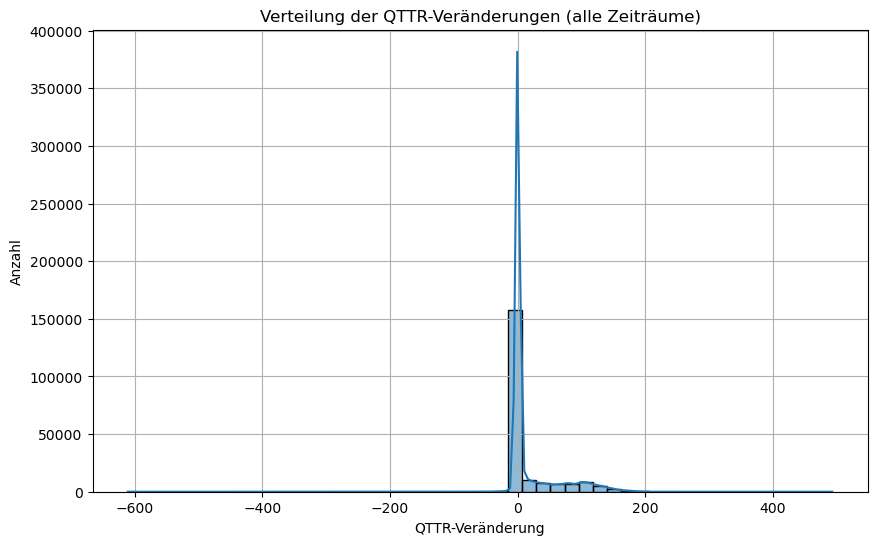

None


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden (Pfad anpassen, falls nötig)
df = pd.read_csv('ttr_entwicklung_ohne_nall_erweitert.csv')

# Relevante QTTR-Differenzspalten
change_cols = [
    'Q-TTR_dif_24_Q1-25_Q1',
    'Q-TTR_dif_24_Q1-24_Q3',
    'Q-TTR_dif_24_Q1-24_Q2',
    'Q-TTR_dif_24_Q2-24_Q3',
    'Q-TTR_dif_24_Q3-24_Q4',
    'Q-TTR_dif_24_Q4-25_Q1'
]

# Histogramm der QTTR-Veränderungen
all_changes = pd.concat([df[col] for col in change_cols], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.histplot(all_changes.dropna(), bins=50, kde=True)
plt.title('Verteilung der QTTR-Veränderungen (alle Zeiträume)')
plt.xlabel('QTTR-Veränderung')
plt.ylabel('Anzahl')
plt.grid(True)
plt.show()

# Berechne maximale absolute Veränderung + zugehörigen Zeitraum
df['max_abs_change'] = df[change_cols].abs().max(axis=1)

# Zeitraum ermitteln, in dem die maximale Veränderung auftrat
df['max_change_value'] = df[change_cols].apply(lambda row: row[row.abs() == row.abs().max()].values[0], axis=1)
df['max_change_period'] = df[change_cols].apply(lambda row: row.abs().idxmax(), axis=1)

# Top 300 Spieler mit größter Veränderung
top_300 = df.nlargest(300, 'max_abs_change')

# Schöne Tabelle mit Namen, Zeitraum und Veränderung
result_table = top_300[['Nachname', 'Vorname', 'max_change_period', 'max_change_value', 'max_abs_change']].copy()
result_table = result_table.rename(columns={
    'Nachname': 'Nachname',
    'Vorname': 'Vorname',
    'max_change_period': 'Zeitraum',
    'max_change_value': 'QTTR-Veränderung',
    'max_abs_change': 'QTTR-Veränderung (absolut)'
})

# Optional: sortieren
result_table = result_table.sort_values(by='QTTR-Veränderung (absolut)', ascending=False)

# Ausgabe (Beispiel)
print(result_table.to_csv('300_größten_änderungen'))  # oder result_table.to_csv(...) zum Export


In [31]:
qttr_cols = [
    'Q-TTR_dif_24_Q1-25_Q1',
    'Q-TTR_dif_24_Q1-24_Q3',
    'Q-TTR_dif_24_Q1-24_Q2',
    'Q-TTR_dif_24_Q2-24_Q3',
    'Q-TTR_dif_24_Q3-24_Q4',
    'Q-TTR_dif_24_Q4-25_Q1'
]
df['max_abs_change'] = df[qttr_cols].abs().max(axis=1)


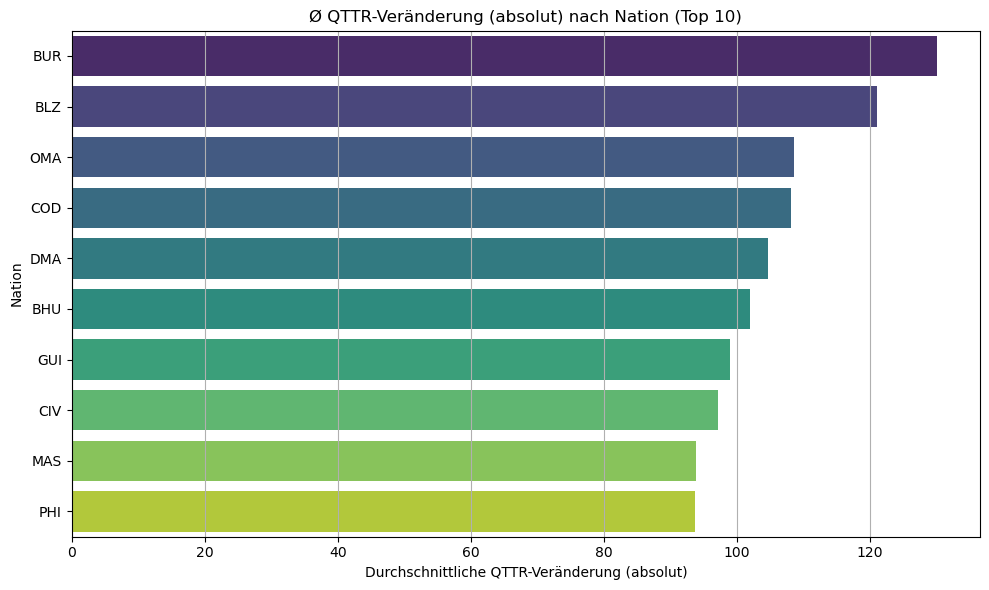

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mittelwert der absoluten Veränderung pro Nation
nation_stats = df.groupby('Nation')['max_abs_change'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=nation_stats.values, y=nation_stats.index, palette='viridis')
plt.title('Ø QTTR-Veränderung (absolut) nach Nation (Top 10)')
plt.xlabel('Durchschnittliche QTTR-Veränderung (absolut)')
plt.ylabel('Nation')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


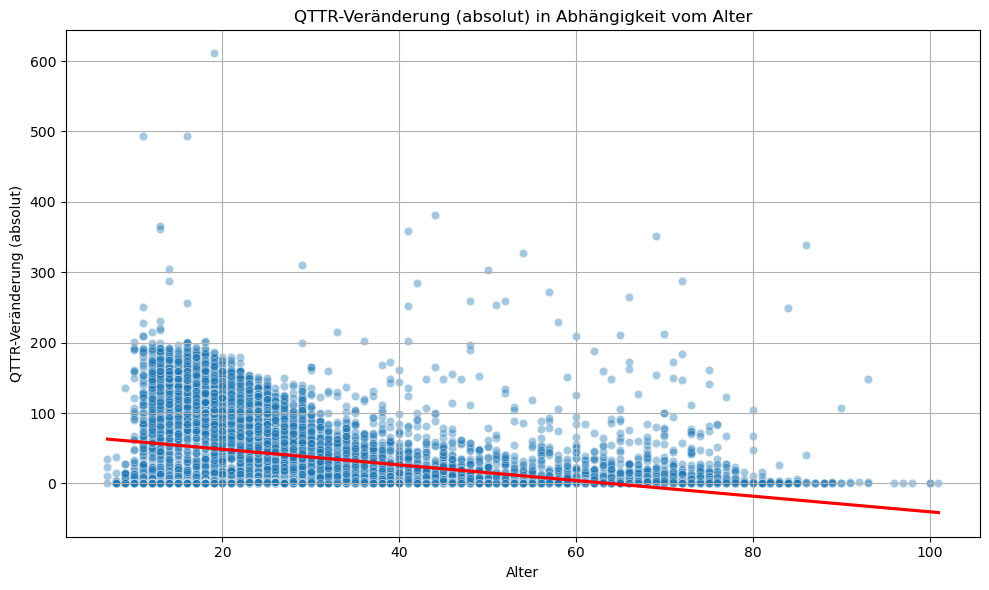

In [33]:
from datetime import datetime

# Alter berechnen
df['Geburtsdatum'] = pd.to_datetime(df['Geburtsdatum'], errors='coerce')
df['Alter'] = (pd.to_datetime("2025-01-01") - df['Geburtsdatum']).dt.days // 365

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Alter', y='max_abs_change', alpha=0.4)
sns.regplot(data=df, x='Alter', y='max_abs_change', scatter=False, color='red')
plt.title('QTTR-Veränderung (absolut) in Abhängigkeit vom Alter')
plt.xlabel('Alter')
plt.ylabel('QTTR-Veränderung (absolut)')
plt.grid(True)
plt.tight_layout()
plt.show()


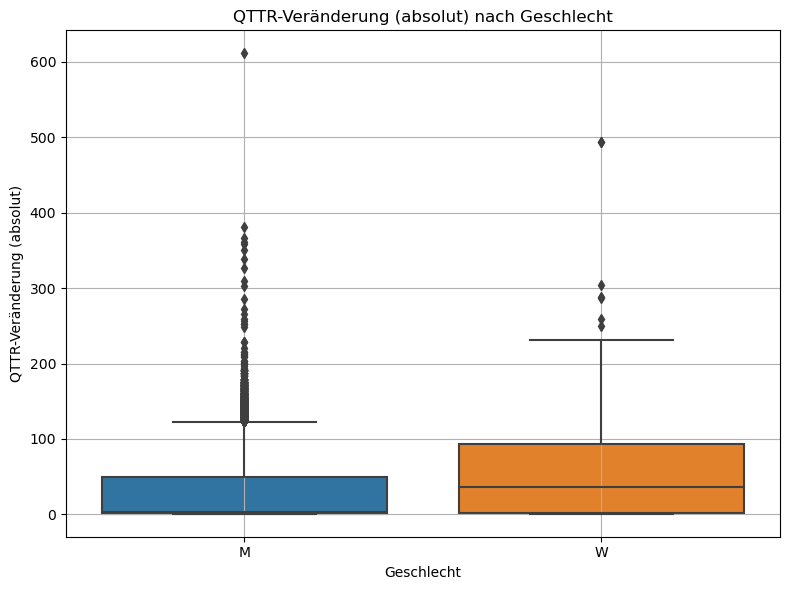

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Geschlecht', y='max_abs_change')
plt.title('QTTR-Veränderung (absolut) nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('QTTR-Veränderung (absolut)')
plt.grid(True)
plt.tight_layout()
plt.show()


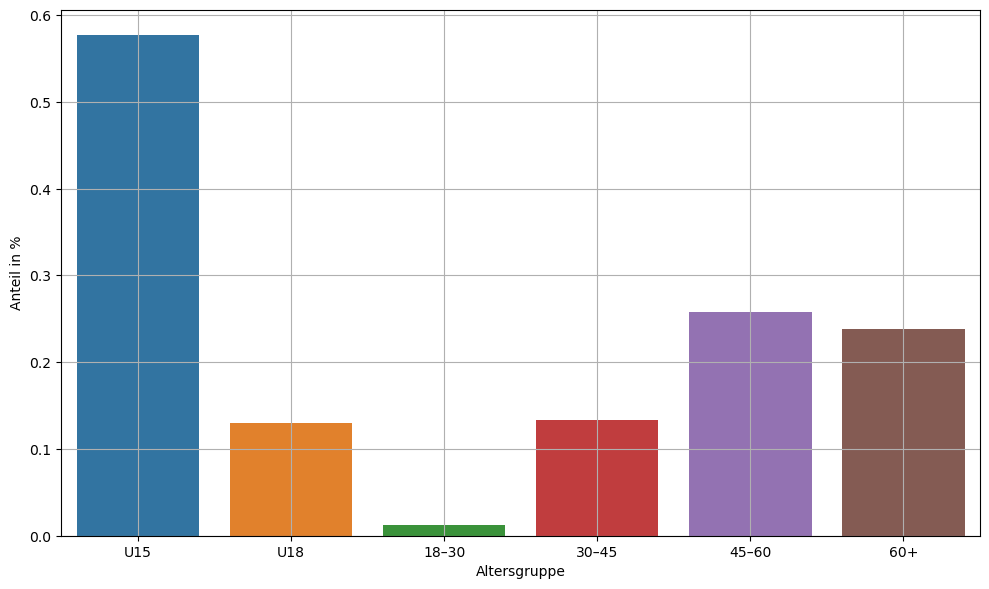

In [30]:
df['Altersgruppe'] = pd.cut(df['Alter'], bins=[0, 14, 18, 30, 45, 60, 100], labels=[
    'U15', 'U18', '18–30', '30–45', '45–60', '60+'
])

# Anteil Spieler mit großer Veränderung in jeder Gruppe
df['große_änderung'] = df['max_abs_change'] > 200
group_stats = df.groupby('Altersgruppe')['große_änderung'].mean()

group_stats_percent = group_stats * 100



plt.figure(figsize=(10, 6))
sns.barplot(x=group_stats_percent.index, y=group_stats_percent.values)
plt.ylabel('Anteil mit großer Veränderung (%)')
plt.ylabel('Anteil in %')
plt.xlabel('Altersgruppe')
plt.grid(True)
plt.tight_layout()
plt.show()
